In [13]:
import cv2
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [7]:
hogger = cv2.HOGDescriptor()
image = cv2.imread('test.png', 0)
hog = hogger.compute(image, (720,1280), (72, 128))
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
len(hog)

7560

In [156]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

[ WARN:0@2178.884] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


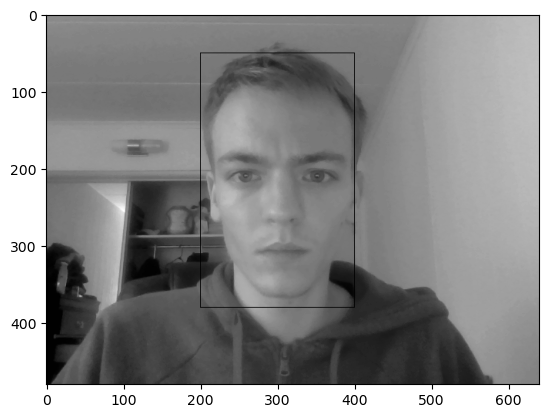

In [34]:
plt.imshow(cv2.rectangle(image.copy(), (200, 50), (400, 380), 0), cmap='gray')

In [51]:
subimage = image.copy()[50:380,200:400]

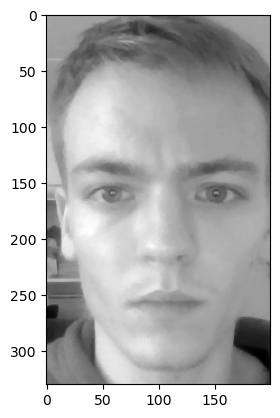

In [54]:
plt.imshow(subimage, cmap='gray')

In [58]:
face = cv2.resize(subimage, (100, 100))

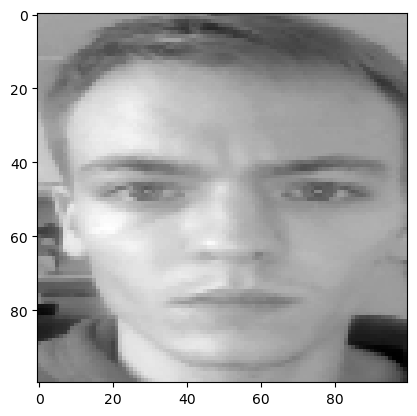

In [59]:
plt.imshow(face, cmap='gray')

In [63]:
hoggedFace = hogger.compute(face, (100,100), (10, 10))

In [66]:
len(hoggedFace)

3780

In [93]:
r = np.random.uniform(0, 0.2, [200,2,3])

In [94]:
r.shape

(200, 2, 3)

In [100]:
r[0]

array([[0.19444945, 0.04114833, 0.04673484],
       [0.00774123, 0.16026387, 0.00674881]])

In [102]:
new_row = np.array([0,0,1])

In [115]:
m = np.zeros([200,3,3])

In [122]:
m[:,2,:] = [0,0,0]

In [123]:
m[:,0:2,:] = r

In [124]:
m

array([[[0.19444945, 0.04114833, 0.04673484],
        [0.00774123, 0.16026387, 0.00674881],
        [0.        , 0.        , 0.        ]],

       [[0.07960742, 0.10787475, 0.03737639],
        [0.13068684, 0.12640539, 0.12514649],
        [0.        , 0.        , 0.        ]],

       [[0.0536669 , 0.17658971, 0.0678273 ],
        [0.07346462, 0.15292729, 0.10277125],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.12932704, 0.01936547, 0.15334728],
        [0.08174043, 0.00642112, 0.16912712],
        [0.        , 0.        , 0.        ]],

       [[0.02054143, 0.18824902, 0.04280141],
        [0.10549276, 0.12118807, 0.09754485],
        [0.        , 0.        , 0.        ]],

       [[0.14906844, 0.01304131, 0.08283126],
        [0.18957961, 0.11333268, 0.18216748],
        [0.        , 0.        , 0.        ]]])

In [126]:
M = expm(m)

In [127]:
M

array([[[1.21483336, 0.04913845, 0.0517473 ],
        [0.00924441, 1.17400967, 0.00752389],
        [0.        , 0.        , 1.        ]],

       [[1.09062449, 0.11987109, 0.04623976],
        [0.14522003, 1.14262668, 0.13633992],
        [0.        , 0.        , 1.        ]],

       [[1.06221714, 0.19631048, 0.07957365],
        [0.08166883, 1.1725625 , 0.11396261],
        [0.        , 0.        , 1.        ]],

       ...,

       [[1.13892732, 0.02074404, 0.16546257],
        [0.08755926, 1.00727212, 0.17627877],
        [0.        , 0.        , 1.        ]],

       [[1.03125563, 0.20282824, 0.05303676],
        [0.1136628 , 1.13969699, 0.10641853],
        [0.        , 0.        , 1.        ]],

       [[1.16217068, 0.01487657, 0.09065878],
        [0.21625858, 1.12140594, 0.20154936],
        [0.        , 0.        , 1.        ]]])

In [49]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

[ WARN:0@1111.692] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


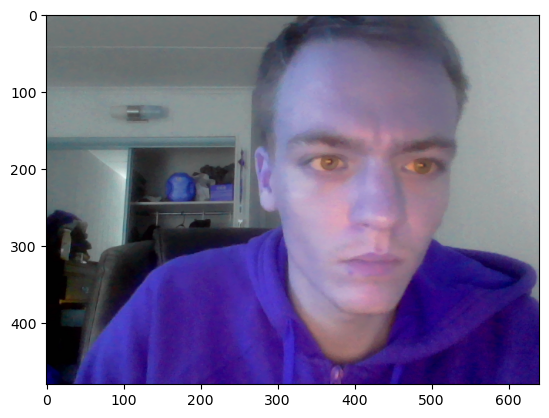

In [50]:
plt.imshow(frame)

In [51]:
frame.shape

(480, 640, 3)

In [52]:
def affine_from_rect(img_width, img_height, x, y, w, h):
    nw = w / img_width
    nh = h / img_height
    
    nx = -x * 1/nw
    ny = -y * 1/nh
    return np.array([
        [1/nw, 0, nx],
        [0, 1/nh, ny],
        [0, 0, 1]])

In [71]:
testM = affine_from_rect(640, 480, 300, 0, 300, 50)

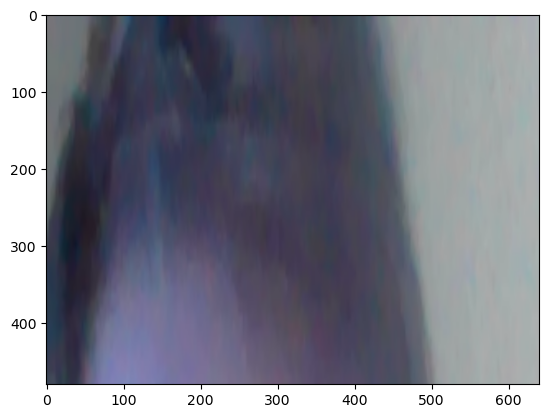

In [72]:
testM = testM.astype(np.float32)
warped = cv2.warpAffine(frame, testM[0:2], (640, 480))
plt.imshow(warped, cmap='gray')

In [ ]:
import cv2
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

[ WARN:0@3.206] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


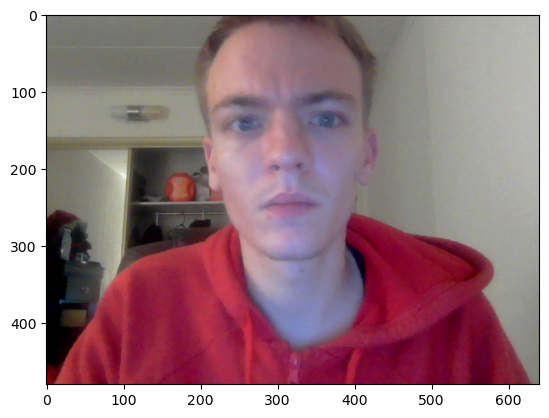

In [3]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()
plt.imshow(frame[:,:,::-1], cmap='gray')

In [ ]:
cv.imshow('frame', frame)
cv.waitKey(0)

In [ ]:
cv.destroyAllWindows()

In [27]:
# Create a callback function for mouse events
def draw_rectangle(event, x, y, flags, param):
    global drawing, top_left_pt, bottom_right_pt, img

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        top_left_pt = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bottom_right_pt = (x, y)
        img = cv2.rectangle(frame.copy(), top_left_pt, bottom_right_pt, (0, 255, 0), 2)
        cv2.imshow('Image', img)

# Initialize global variables
drawing = False
top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)

# Create a black image window
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
img = frame.copy()
cap.release()

cv2.namedWindow('Image')
cv2.imshow('Image', frame)

# Set the callback function for mouse events
cv2.setMouseCallback('Image', draw_rectangle)

while True:
    cv2.imshow('Image', img)

    # Break the loop when 'ESC' key is pressed
    if cv2.waitKey(1) == 27:
        break
    if cv2.getWindowProperty('Image',cv2.WND_PROP_VISIBLE) < 1:        
        break

cv2.destroyAllWindows()

[ WARN:0@642.455] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


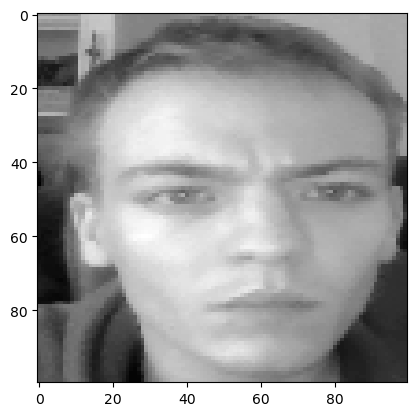

In [156]:
face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
face = cv2.resize(face[top_left_pt[1]:bottom_right_pt[1],top_left_pt[0]:bottom_right_pt[0]], (100,100))
plt.imshow(face, cmap='gray')

In [157]:
hogger = cv2.HOGDescriptor()
hog = hogger.compute(face, (100,100), (10, 10))

In [94]:
hog

array([0.1511235 , 0.02809504, 0.05023145, ..., 0.04738916, 0.01234313,
       0.03965628], dtype=float32)

In [133]:
m = np.zeros([200,3,3])
m[:,0:2,0:2] = np.random.uniform(-0.2, 0.2, [200,2,2])
m[:,0:2,2] = np.random.uniform(-20, 20, [200,1])
M = expm(m)

In [134]:
M[0]

array([[ 9.42821513e-01, -6.39807717e-02,  5.19435527e+00],
       [-4.61434254e-02,  8.85338103e-01,  5.08115975e+00],
       [-3.46944695e-18,  0.00000000e+00,  1.00000000e+00]])

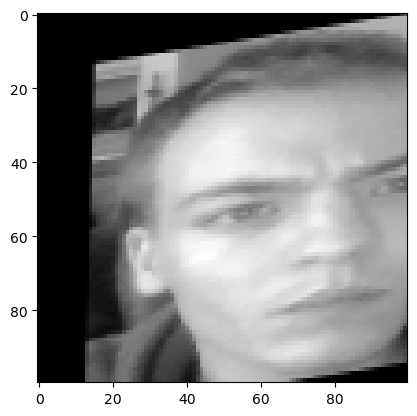

In [137]:
warped = cv2.warpAffine(face, M[np.random.randint(0, 200)][0:2], (100, 100))
plt.imshow(warped, cmap='gray')

In [121]:
hogs = np.zeros((200, 3780))
for i in range(200):
    warped = cv2.warpAffine(face, M[i,0:2], (100, 100))
    hogs[i] = hogger.compute(warped, (100,100), (10, 10))

In [152]:
y = m[:,0:2,:].reshape((-1, 6))
X = hogs

model = Ridge()
model.fit(X, y)
model.score(X, y)

0.9754436211900921

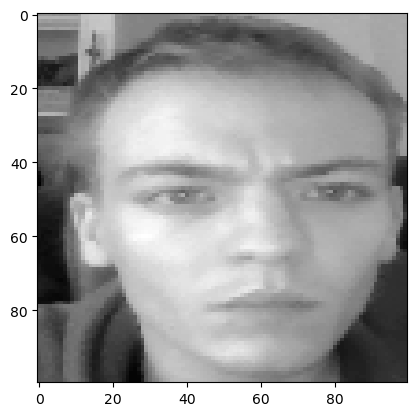

In [154]:
plt.imshow(face, cmap='gray')

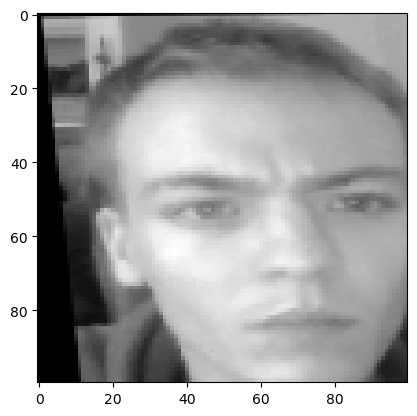

In [204]:
warped = face
hog = hogger.compute(warped, (100,100), (10, 10))
test = expm(np.pad(model.predict(hog[None]).reshape(2,3),((0,1),(0,0))))

warped = cv2.warpAffine(warped, test[0:2], (100, 100))
plt.imshow(warped, cmap='gray')

In [1]:
import cv2
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [93]:
def begin_tracking():
    global tracking, warped
    
    face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face[top_left_pt[1]:bottom_right_pt[1],top_left_pt[0]:bottom_right_pt[0]], (r,r))
  
    m = np.zeros([n,3,3])
    m[:,0:2,2] = np.random.uniform(-l * r, l * r, [n,2])
    #m[:,0:2,0:3] = np.random.uniform(-l, l, [n,2,3])
    #m[:,0:2,2] *= r
    M = expm(m)
    hog_size = hogger.compute(face, (r,r), (r // 10, r // 10)).shape[0]

    hogs = np.zeros((n, hog_size))
    for i in range(n):
        warped = cv2.warpAffine(face, M[i,0:2], (r, r))
        hogs[i] = hogger.compute(warped, (r,r), (r // 10, r // 10))

    y = m[:,0:2,:].reshape((-1, 6))
    X = hogs

    model.fit(X, y)
    
    tracking = True

def track():
    global top_left_pt, bottom_right_pt, tracking
    if (tracking):
        for i in range(10):
            face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            face = face[top_left_pt[1]:bottom_right_pt[1],top_left_pt[0]:bottom_right_pt[0]]
            
            if (face.shape[0] == 0 or face.shape[1] == 0):
                tracking = False
                top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)
                return
                
            face = cv2.resize(face, (r,r))
            hog = hogger.compute(face, (r,r), (r // 10, r // 10))
            delta_m = np.zeros((3,3))
            delta_m[0:2] = model.predict(hog[None])[0].reshape((2,3))
            delta_M = expm(delta_m)
            M = np.array([[1,0,top_left_pt[0]],[0,1,top_left_pt[1]],[0,0,1]])
            M = M @ delta_M

            w, h = bottom_right_pt[0] - top_left_pt[0], bottom_right_pt[1] - top_left_pt[1]
            top_left_pt = (int(M[0,2]), int(M[1,2]))
            bottom_right_pt = (int(M[0,2]) + w, int(M[1,2]) + h)

def handle_mouse(event, x, y, flags, param):
    global drawing, tracking, top_left_pt, bottom_right_pt

    x = frame.shape[1] - x

    if event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            bottom_right_pt = (x,y)
    elif event == cv2.EVENT_LBUTTONDOWN:
        tracking = False
        drawing = True
        top_left_pt = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bottom_right_pt = (x, y)
        
        if (bottom_right_pt[0] < top_left_pt[0]):
            tmp = bottom_right_pt[0]
            bottom_right_pt = (top_left_pt[0], bottom_right_pt[1])
            top_left_pt = (tmp, top_left_pt[1])

        if (bottom_right_pt[1] < top_left_pt[1]):
            tmp = bottom_right_pt[1]
            bottom_right_pt = (bottom_right_pt[0], top_left_pt[1])
            top_left_pt = (top_left_pt[0], tmp)
            
        begin_tracking()

drawing = False
tracking = False
top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)


    
l = 0.08 # Range of random Lie vectors
n = 400 # Number of initial samples
r = 100 # Size of training images

model = Ridge()
hogger = cv2.HOGDescriptor()

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

cv2.namedWindow('Image')
cv2.imshow('Image', frame)

cv2.setMouseCallback('Image', handle_mouse)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    if tracking:
        track()

    cv2.rectangle(frame, top_left_pt, bottom_right_pt, (0, 255, 0), 2)

    cv2.imshow('Image', cv2.flip(frame, 1))
    
    # Break the loop when 'ESC' key is pressed
    if cv2.waitKey(1) == 27:
        break
    if cv2.getWindowProperty('Image',cv2.WND_PROP_VISIBLE) < 1:        
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@5711.496] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


In [274]:
def begin_tracking():
    global tracking, warped
    
    face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face[top_left_pt[1]:bottom_right_pt[1],top_left_pt[0]:bottom_right_pt[0]], (r,r))
  
    m = np.zeros([n,3,3])
    
    #m[:,0:2,2] = np.random.uniform(-l, l, [n,2])
    #m[:,0,0] = np.random.uniform(-l, l, [n])
    #m[:,1,1] = np.random.uniform(-l, l, [n])

    m[:,0:2,:] = np.random.uniform(-l, l, [n,2,3])
    
    M = expm(m)
    M[:,0:2,2] *= r
    hog_size = hogger.compute(face, (r,r)).shape[0]

    center_zero = np.array([[1,0,-r / 2],[0,1,-r / 2],[0,0,1]])
    uncenter_zero = np.linalg.inv(center_zero)
    M = uncenter_zero @ M @ center_zero

    hogs = np.zeros((n, hog_size))
    for i in range(n):
        warped = cv2.warpAffine(face, M[i,0:2], (r, r), 0, 0, cv2.BORDER_WRAP)
        hogs[i] = hogger.compute(warped, (r,r))

    y = m[:,0:2,:].reshape((-1, 6))
    X = hogs

    model.fit(X, y)
    
    tracking = True

def track():
    global top_left_pt, bottom_right_pt, tracking, cut
    if (tracking):
        for i in range(10):
            face = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            face = face[max(0,top_left_pt[1]):bottom_right_pt[1],max(0,top_left_pt[0]):bottom_right_pt[0]]
            
            if (face.shape[0] == 0 
                or face.shape[1] == 0
                or abs(top_left_pt[0]) > 10000 
                or abs(top_left_pt[1]) > 10000 
                or abs(bottom_right_pt[0]) > 10000 
                or abs(bottom_right_pt[1]) > 10000):
                
                tracking = False
                top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)
                return
                
            face = cv2.resize(face, (r,r))
            
            cut = face.copy()
            
            hog = hogger.compute(face, (r,r))
            delta_m = np.zeros((3,3))
            delta_m[0:2] = model.predict(hog[None])[0].reshape((2,3))
            delta_M = expm(delta_m)
            #print(delta_M)

            dx = int(delta_M[0,2] * r)
            dy = int(delta_M[1,2] * r)

            sx = delta_M[0,0]
            sy = delta_M[1,1]

            dw = int((bottom_right_pt[0] - top_left_pt[0]) * sx) - (bottom_right_pt[0] - top_left_pt[0])
            dh = int((bottom_right_pt[1] - top_left_pt[1]) * sy) - (bottom_right_pt[1] - top_left_pt[1])
                        
            top_left_pt = top_left_pt[0] + dx - dw // 2, top_left_pt[1] + dy - dh // 2
            bottom_right_pt = bottom_right_pt[0] + dx + dw // 2, bottom_right_pt[1] + dy + dh // 2
            
            #bottom_right_pt = top_left_pt[0] + w, top_left_pt[1] + h


def handle_mouse(event, x, y, flags, param):
    global drawing, tracking, top_left_pt, bottom_right_pt

    x = frame.shape[1] - x

    if event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            bottom_right_pt = (x,y)
    elif event == cv2.EVENT_LBUTTONDOWN:
        tracking = False
        drawing = True
        top_left_pt = (x, y)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        bottom_right_pt = (x, y)
        
        if (bottom_right_pt[0] < top_left_pt[0]):
            tmp = bottom_right_pt[0]
            bottom_right_pt = (top_left_pt[0], bottom_right_pt[1])
            top_left_pt = (tmp, top_left_pt[1])

        if (bottom_right_pt[1] < top_left_pt[1]):
            tmp = bottom_right_pt[1]
            bottom_right_pt = (bottom_right_pt[0], top_left_pt[1])
            top_left_pt = (top_left_pt[0], tmp)
            
        begin_tracking()

drawing = False
tracking = False
top_left_pt, bottom_right_pt = (-1, -1), (-1, -1)
cut = []


    
l = 0.08 # Range of random Lie vectors
n = 400 # Number of initial samples
r = 100 # Size of training images

model = Ridge()
hogger = cv2.HOGDescriptor()

cap = cv2.VideoCapture(0)
ret, frame = cap.read()

cv2.namedWindow('Image')
cv2.imshow('Image', frame)

cv2.setMouseCallback('Image', handle_mouse)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break

    if tracking:
        track()

    cv2.rectangle(frame, top_left_pt, bottom_right_pt, (0, 255, 0), 2)

    cv2.imshow('Image', cv2.flip(frame, 1))

    if len(cut) != 0:
        cv2.imshow('Cut', cv2.flip(cut,1))
    
    # Break the loop when 'ESC' key is pressed
    if cv2.waitKey(1) == 27:
        break
    if cv2.getWindowProperty('Image',cv2.WND_PROP_VISIBLE) < 1:        
        break

cap.release()
cv2.destroyAllWindows()

[ WARN:0@53568.574] global cap_gstreamer.cpp:1728 open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


In [155]:
cap.release()
cv2.destroyAllWindows()